In [51]:
import pickle
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import statistics
import numpy as np

import seaborn as sns
sns.set()

# Visualising the Different Characteristics of the Peaks

I have identified 3 peaks in the total nation wide ammount of new confirmed COVID-19 cases. These peaks can be found at the weeks with the indices 20, 25, and 32.  
I will investigate these three peaks and the time steps surrounding them further.


![peaks](visualisations/peaks.jpg)


Firstly, I need to load in my pickled node vectors and network topology.

In [36]:
time_series = pickle.load(open('data/time_series.pickle', 'rb'))
topology = nx.read_gpickle('networks/final_topology.gpickle')

nodes = list(topology.nodes)

## Calculating the differences
I need the difference pointwise differences in activation state from timestep t-1 to t. So I calculate these per municipality and store them in three dictionaries of the form ```{municipality (str): difference (float)}``` -- each dictionary represents a time interval from timestep t-1 to t, and the values of the dictionary are equivalent to the vector $diff$.  

If the parameter ```norm``` is set to ```True```, the pointwise differences are normalised by the total difference between step t-1 and t.

In [40]:
def getDiff(t, norm=False):
    time_dict = time_series
    diffs = {}
    total = 0
    for muni in nodes:
        muni_t = time_dict[t][muni]
        muni_tneg1 = time_dict[t-1][muni]
        diff = muni_t - muni_tneg1
        diffs[muni] = diff
        total += muni_t
    if norm == True:
        diffs = {k: v/total for k, v in diffs.items()}
    return diffs

## Plotting distribution of $diff$ sorrounding the peaks

Function for plotting the distribution of the $diff$ vector at step t-1 - t and at step t - t+1 side by side with added text showing the vector mean and standard deviation.

In [ ]:
def plotPeaks(t, norm=False, save=False):
    if norm:
        p1 =  getDiff(t, norm=True)
        p2 =  getDiff((t+1), norm=True)
        stats1 = (round(statistics.stdev(p1.values()), 4), round(statistics.mean(p1.values()), 4))
        stats2 = (round(statistics.stdev(p2.values()), 4), round(statistics.mean(p2.values()), 4))
        bins = [n for n in np.arange(-0.025,0.026, 0.002)]
        xval = [-0.02, -0.01, 0.00, 0.01, 0.02]
        x = 0.008
        ml = 0.01
        
    else:
        p1 = getDiff(t)
        p2 =  getDiff((t+1))
        stats1 = (round(statistics.stdev(p1.values()), 2), round(statistics.mean(p1.values()), 2))
        stats2 = (round(statistics.stdev(p2.values()), 2), round(statistics.mean(p2.values()), 2))
        bins = [n for n in range(-125,126, 10)]
        x = 40  
        ml = 50
    
    if save != False:
        fig, (ax1, ax2) = plt.subplots(1,2, figsize=(6.6,2.5), sharex=True, sharey=True, dpi=400)
    else: fig, (ax1, ax2) = plt.subplots(1,2, figsize=(6.6,2.5), sharex=True, sharey=True)
    
    fig.text(0.5, 0, 'Difference in activation states (scale indexed to 1)', ha='center', size=11)
    ax1.set_ylabel('#Occurences')
    
    plt.ylim([0, 40])
    y = 20
    
    ax1.set_title('Weeks ' + str(t-1) + '-' + str(t))
    ax1.text(x, y, '$\mu$ = '+str(stats1[1])+'\n$\sigma$ = '+str(stats1[0]))
    ax1.hist(p1.values(), bins=bins, rwidth=.8, color='tab:blue')
    ax1.xaxis.set_major_locator(MultipleLocator(ml))
    
    ax2.set_title('Weeks ' + str(t) + '-' + str(t+1))
    ax2.text(x, y, '$\mu$ = '+str(stats2[1])+'\n$\sigma$ = '+str(stats2[0]))
    ax2.hist(p2.values(), bins=bins, rwidth=.8, color='tab:blue')
    ax2.xaxis.set_major_locator(MultipleLocator(ml))
    
    fig.tight_layout()
    if save != False:
        s = 'visualisations/peak' + str(t)
        if norm:
            s += '_norm'
        s += '.jpg'
        plt.savefig(s, bbox_inches = "tight");
    
    plt.show();

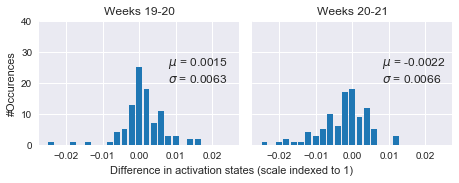

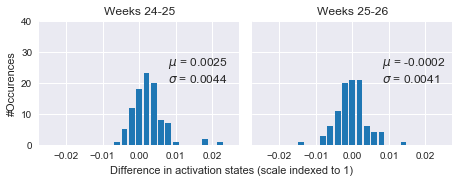

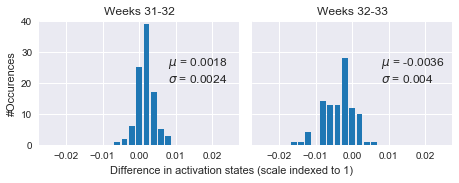

In [50]:
plotPeaks(20, norm=True)
plotPeaks(25, norm=True)
plotPeaks(32, norm=True)

In [49]:
p20 =  getDiff(20, norm=True)

inverse_p20 = [(value, key) for key, value in p20.items()]
print(min(inverse_p20))
print(max(inverse_p20))

nx.shortest_path(topology, 'Brønderslev', 'Solrød', weight='weight')

(-0.024493175467685223, 'Brønderslev')
(0.027312106219210753, 'Solrød')


['Brønderslev', 'Thisted', 'Odsherred', 'Struer', 'Solrød']